In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashvrdnjain/hotdognothotdog")

print("Path to dataset files:", path)

/home/david/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/david/.cache/kagglehub/datasets/yashvrdnjain/hotdognothotdog/versions/1


In [2]:
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

2025-04-23 12:16:18.075437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745428578.087817   60575 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745428578.091831   60575 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745428578.101554   60575 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745428578.101569   60575 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745428578.101570   60575 computation_placer.cc:177] computation placer alr

In [3]:
directory = f'{path}/hotdog-nothotdog/train/'
test_directory = f'{path}/hotdog-nothotdog/test/'

In [4]:
train_dataset = image_dataset_from_directory(directory, image_size=(180, 180), batch_size = 32)
test_dataset = image_dataset_from_directory(test_directory, image_size=(180, 180), batch_size = 32)

Found 3000 files belonging to 2 classes.


I0000 00:00:1745428579.819490   60575 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5129 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


Found 644 files belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_dataset:
    print('data batch  shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch  shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [6]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=8, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs=outputs)

In [7]:
def define_model(num_layers, start_filter, max_filter):
    inputs = keras.Input(shape=(180, 180, 3))
    x = layers.Rescaling(1./255)(inputs)
    num_filters = start_filter
    for _ in range(num_layers):
        x = layers.Conv2D(filters=num_filters, kernel_size=3, activation='relu')(x)
        x = layers.MaxPooling2D(pool_size=2)(x)
        if num_filters < max_filter:
            num_filters ** 2
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(inputs=inputs, outputs=outputs)
        
        

    

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,569 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,097 (101.94 KB)

 Trainable params: 26,097 (101.94 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='hotdog_convnet.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [11]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=train_dataset,
    callbacks=callbacks)

Epoch 1/30


I0000 00:00:1745428581.666919   60644 service.cc:152] XLA service 0x773b240044d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745428581.666940   60644 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-04-23 12:16:21.685858: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745428581.836636   60644 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-04-23 12:16:22.019447: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[32,8,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,180,180]{3,2,1,0} %bitcast.2719, f32[8,3,3,3]{3,2,1,0} %bitcast.2517, f32[8]{0} %bitcast.3148), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn

18/94 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5261 - loss: 0.6901

I0000 00:00:1745428583.493438   60644 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5696 - loss: 0.6738

2025-04-23 12:16:24.608742: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[24,8,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,180,180]{3,2,1,0} %bitcast.2722, f32[8,3,3,3]{3,2,1,0} %bitcast.2520, f32[8]{0} %bitcast.3151), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 12:16:24.654511: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted po

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5700 - loss: 0.6737

2025-04-23 12:16:26.093407: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[32,8,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,180,180]{3,2,1,0} %bitcast.459, f32[8,3,3,3]{3,2,1,0} %bitcast.466, f32[8]{0} %bitcast.468), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 12:16:26.144122: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted poten

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5705 - loss: 0.6735 - val_accuracy: 0.6110 - val_loss: 0.6483
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6618 - loss: 0.6277 - val_accuracy: 0.6750 - val_loss: 0.6005
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6756 - loss: 0.6068 - val_accuracy: 0.6833 - val_loss: 0.5969
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6804 - loss: 0.6023 - val_accuracy: 0.6850 - val_loss: 0.5898
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6723 - loss: 0.5995 - val_accuracy: 0.7050 - val_loss: 0.5672
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6839 - loss: 0.5792 - val_accuracy: 0.7253 - val_loss: 0.5475
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7089 - loss: 0.5652 - val_accuracy: 0.7337 - val_loss: 0.5294
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7350 - loss: 0.5420 - val_accuracy: 0.7437 - val_loss: 0.

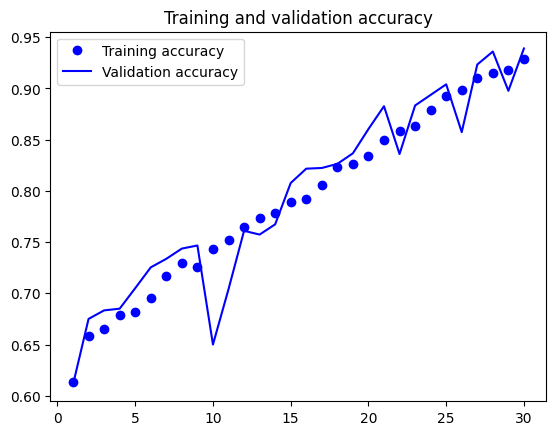

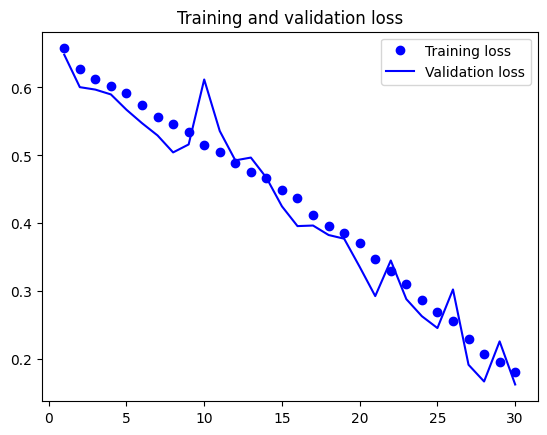

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(dataset, model_arg):
    Y_true = []
    Y_pred = []
    # Loop through the batches in the original 3-channel dataset
    for images, labels in dataset:
        predictions = model_arg.predict(images)
        Y_true.extend(labels.numpy())
        Y_pred.extend(np.round(predictions).flatten())  # round for binary labels
    # Convert to arrays for metrics
    Y_true = np.array(Y_true)
    Y_pred = np.array(Y_pred)
    # Compute metrics
    accuracy = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1 = f1_score(Y_true, Y_pred)
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")


evaluate(train_dataset, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

2025-04-23 12:17:15.230511: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
#Test Models
model = define_model(2, 8, 32)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=train_dataset,
    callbacks=callbacks)

evaluate(train_dataset, model)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5637 - loss: 0.8780 - val_accuracy: 0.5933 - val_loss: 0.6791
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6444 - loss: 0.6158 - val_accuracy: 0.7237 - val_loss: 0.5567
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7116 - loss: 0.5641 - val_accuracy: 0.7417 - val_loss: 0.5234
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7422 - loss: 0.5275 - val_accuracy: 0.7833 - val_loss: 0.4758
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7623 - loss: 0.4959 - val_accuracy: 0.8267 - val_loss: 0.4375
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7837 - loss: 0.4627 - val_accuracy: 0.7333 - val_loss: 0.5096
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8000 - loss: 0.4395 - val_accuracy: 0.8543 - val_loss: 0.3591
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8195 - loss: 0.3928 - val_accuracy: 0.8680 - v

2025-04-23 12:19:32.541536: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
#Test Models
model = define_model(3, 8, 32)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=train_dataset,
    callbacks=callbacks)

evaluate(train_dataset, model)

Epoch 1/30


2025-04-23 12:19:33.172925: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.11 = (f32[32,8,41,41]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,8,43,43]{3,2,1,0} %bitcast.2490, f32[8,8,3,3]{3,2,1,0} %bitcast.1905, f32[8]{0} %bitcast.2530), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_3_1/conv2d_11_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


91/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5618 - loss: 0.6869

2025-04-23 12:19:34.644402: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.11 = (f32[24,8,41,41]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,8,43,43]{3,2,1,0} %bitcast.2493, f32[8,8,3,3]{3,2,1,0} %bitcast.1908, f32[8]{0} %bitcast.2533), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_3_1/conv2d_11_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5631 - loss: 0.6861

2025-04-23 12:19:35.407148: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.11 = (f32[32,8,41,41]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,8,43,43]{3,2,1,0} %bitcast.434, f32[8,8,3,3]{3,2,1,0} %bitcast.441, f32[8]{0} %bitcast.443), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_3_1/conv2d_11_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 12:19:36.068846: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted pote

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5636 - loss: 0.6859 - val_accuracy: 0.6800 - val_loss: 0.6066
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6743 - loss: 0.6078 - val_accuracy: 0.7033 - val_loss: 0.5823
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7049 - loss: 0.5779 - val_accuracy: 0.7017 - val_loss: 0.5640
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7108 - loss: 0.5613 - val_accuracy: 0.7380 - val_loss: 0.5380
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7285 - loss: 0.5494 - val_accuracy: 0.7487 - val_loss: 0.5185
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7307 - loss: 0.5460 - val_accuracy: 0.7410 - val_loss: 0.5256
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7356 - loss: 0.5294 - val_accuracy: 0.7787 - val_loss: 0.4880
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7430 - loss: 0.5116 - val_accuracy: 0.7727 - val_loss: 0.

In [17]:
#Test Models
model = define_model(5, 8, 32)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=train_dataset,
    callbacks=callbacks)

evaluate(train_dataset, model)

Epoch 1/30


2025-04-23 12:20:19.770667: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.18 = (f32[32,8,18,18]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,8,20,20]{3,2,1,0} %bitcast.3540, f32[8,8,3,3]{3,2,1,0} %bitcast.2684, f32[8]{0} %bitcast.3580), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_4_1/conv2d_15_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 12:20:19.796559: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted p

90/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4927 - loss: 0.6941

2025-04-23 12:20:21.526060: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.18 = (f32[24,8,18,18]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,8,20,20]{3,2,1,0} %bitcast.3543, f32[8,8,3,3]{3,2,1,0} %bitcast.2687, f32[8]{0} %bitcast.3583), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_4_1/conv2d_15_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 12:20:21.549063: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted p

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4929 - loss: 0.6941

2025-04-23 12:20:22.530005: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.18 = (f32[32,8,18,18]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,8,20,20]{3,2,1,0} %bitcast.507, f32[8,8,3,3]{3,2,1,0} %bitcast.514, f32[8]{0} %bitcast.516), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_4_1/conv2d_15_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 12:20:22.554466: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted pote

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4930 - loss: 0.6941 - val_accuracy: 0.5763 - val_loss: 0.6891
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5778 - loss: 0.6808 - val_accuracy: 0.6383 - val_loss: 0.6516
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6295 - loss: 0.6381 - val_accuracy: 0.6620 - val_loss: 0.6157
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6390 - loss: 0.6277 - val_accuracy: 0.6587 - val_loss: 0.6146
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6621 - loss: 0.6187 - val_accuracy: 0.6723 - val_loss: 0.6015
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6585 - loss: 0.6134 - val_accuracy: 0.6707 - val_loss: 0.5984
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6740 - loss: 0.6065 - val_accuracy: 0.6813 - val_loss: 0.5891
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6686 - loss: 0.6017 - val_accuracy: 0.6883 - val_loss: 0.

2025-04-23 12:21:07.390956: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
import tensorflow as tf
# Accumulate batches
x_list = []
y_list = []

for images, labels in train_dataset:
    x_list.append(images.numpy())
    y_list.append(labels.numpy())

# Stack everything into NumPy arrays
xtrain = np.vstack(x_list)
ytrain_original = np.concatenate(y_list)

N = len(xtrain[:, 0, 0, 0])
L = len(xtrain[0, :, 0, 0])
xtrain_with_outputlabels = np.zeros((N, L, L, 4))  # 3 + 1 channels

for i in range(len(xtrain)):
    existing = xtrain[i, :, :, :]
    newchannel = np.full((L, L), ytrain_original[i]).reshape(L, L, 1)
    x = np.concatenate((existing, newchannel), axis = -1)
    xtrain_with_outputlabels[i] = x

train_dataset = tf.data.Dataset.from_tensor_slices((xtrain_with_outputlabels, ytrain_original))

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
inputs = keras.Input(shape=(180, 180, 4))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=2, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='hotdog_convnet.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=train_dataset,
    callbacks=callbacks)